In [1]:
import pandas as pd
import os

# === STEP 1: Define file path ===
file_path = r"D:\Kaiburr\Datasets\complaints.csv"

print("🔍 Inspecting dataset at:", file_path)

# === STEP 2: Check file size ===
size_mb = os.path.getsize(file_path) / (1024 * 1024)
print(f"\n📦 File size: {size_mb:.2f} MB")

# === STEP 3: Read first 1000 rows safely ===
try:
    df_sample = pd.read_csv(file_path, nrows=1000)
    print("\n✅ Successfully loaded sample of 1000 rows.")
except Exception as e:
    print("\n❌ Error while reading file:", e)

# === STEP 4: Display shape, columns, datatypes ===
print("\n📊 Sample Shape:", df_sample.shape)
print("\n📋 Columns and Data Types:")
display(df_sample.dtypes)

# === STEP 5: Display first few rows ===
print("\n👀 Sample Rows:")
display(df_sample.head(5))

# === STEP 6: Count missing values per column ===
print("\n⚠️ Missing Values per Column:")
display(df_sample.isnull().sum())

# === STEP 7: Check for common relevant columns ===
possible_columns = [
    'product',
    'sub_product',
    'issue',
    'consumer_complaint_narrative',
    'company',
    'state',
    'submitted_via',
    'date_received'
]
present_cols = [c for c in possible_columns if c in df_sample.columns]
print(f"\n📌 Relevant Columns Found: {present_cols}")

# === STEP 8: Unique product categories (if exists) ===
if 'product' in df_sample.columns:
    print("\n🏷️ Unique Product Categories (from sample):")
    display(df_sample['product'].value_counts())
else:
    print("\n⚠️ 'product' column not found in sample.")

# === STEP 9: Estimate total number of rows quickly ===
print("\n⏳ Estimating total number of rows... (this might take ~10-15s)")
with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
    total_lines = sum(1 for line in f)
print(f"🧮 Estimated Total Rows: {total_lines - 1:,} (excluding header)")


🔍 Inspecting dataset at: D:\Kaiburr\complaints.csv

📦 File size: 6778.70 MB

✅ Successfully loaded sample of 1000 rows.

📊 Sample Shape: (1000, 18)

📋 Columns and Data Types:


Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object


👀 Sample Rows:


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2020-07-06,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,346XX,NaN,Other,Web,2020-07-06,Closed with explanation,Yes,NaN,3730948
1,2025-10-14,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information is missing that should be on the r...,NaN,NaN,"EQUIFAX, INC.",TX,75062,NaN,NaN,Web,2025-10-14,In progress,Yes,NaN,16558024
2,2025-10-10,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,30341,NaN,NaN,Web,2025-10-10,In progress,Yes,NaN,16507707
3,2025-10-15,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,75287,NaN,NaN,Web,2025-10-15,In progress,Yes,NaN,16593757
4,2025-10-16,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,NC,28379,NaN,NaN,Web,2025-10-16,In progress,Yes,NaN,16623506



⚠️ Missing Values per Column:


Date received                     0
Product                           0
Sub-product                       1
Issue                             0
Sub-issue                        11
Consumer complaint narrative    967
Company public response         954
Company                           0
State                             1
ZIP code                          0
Tags                            978
Consumer consent provided?      931
Submitted via                     0
Date sent to company              0
Company response to consumer      0
Timely response?                  0
Consumer disputed?              998
Complaint ID                      0
dtype: int64


📌 Relevant Columns Found: []

⚠️ 'product' column not found in sample.

⏳ Estimating total number of rows... (this might take ~10-15s)
🧮 Estimated Total Rows: 20,946,816 (excluding header)


In [2]:
import pandas as pd

file_path = r"D:\Kaiburr\Datasets\complaints.csv"

# === STEP 1: Define target categories ===
target_categories = [
    'Credit reporting, repair, or other',
    'Debt collection',
    'Consumer Loan',
    'Mortgage'
]

# =====================================================================
# 🟢 PART 1 — EDA SUBSET (for visualizations and analysis)
# =====================================================================

print("\n=== Creating EDA Subset ===")

use_cols_eda = ['Product', 'Issue', 'State', 'Submitted via', 'Consumer complaint narrative']

# Read only the necessary columns
df_eda = pd.read_csv(file_path, usecols=use_cols_eda)
print("✅ Loaded EDA columns:", df_eda.columns.tolist())
print("📊 Initial shape (EDA):", df_eda.shape)

# Drop missing text values
df_eda = df_eda.dropna(subset=['Consumer complaint narrative'])
print("🧹 After dropping empty complaints (EDA):", df_eda.shape)

# Filter for target categories
df_eda = df_eda[df_eda['Product'].isin(target_categories)]
print("🎯 After filtering target categories (EDA):", df_eda.shape)

# Sample smaller portion (~10k rows) for easy plotting and visuals
df_eda_sample = (
    df_eda.groupby('Product', group_keys=False)
           .apply(lambda x: x.sample(n=min(len(x), 2500), random_state=42))
           .reset_index(drop=True)
)
print("📦 Final EDA subset shape:", df_eda_sample.shape)

# Save to file
eda_output = r"D:\Kaiburr\Datasets\EDA_subset.csv"
df_eda_sample.to_csv(eda_output, index=False)
print(f"💾 EDA subset saved successfully to: {eda_output}")


# =====================================================================
# 🔵 PART 2 — MODEL SUBSET (for text classification)
# =====================================================================

print("\n=== Creating Model Subset ===")

use_cols_model = ['Product', 'Consumer complaint narrative']
df_model = pd.read_csv(file_path, usecols=use_cols_model)
print("✅ Loaded model columns:", df_model.columns.tolist())
print("📊 Initial shape (Model):", df_model.shape)

# Drop missing text values
df_model = df_model.dropna(subset=['Consumer complaint narrative'])
print("🧹 After dropping empty complaints (Model):", df_model.shape)

# Filter for target categories
df_model = df_model[df_model['Product'].isin(target_categories)]
print("🎯 After filtering target categories (Model):", df_model.shape)

# Balanced sample (~25k rows total, 6250 per class)
df_model_sample = (
    df_model.groupby('Product', group_keys=False)
             .apply(lambda x: x.sample(n=min(len(x), 6250), random_state=42))
             .reset_index(drop=True)
)
print("📦 Final model subset shape:", df_model_sample.shape)
print(df_model_sample['Product'].value_counts())

# Save to file
model_output = r"D:\Kaiburr\Datasets\Model_subset.csv"
df_model_sample.to_csv(model_output, index=False)
print(f"💾 Model subset saved successfully to: {model_output}")



=== Creating EDA Subset ===
✅ Loaded EDA columns: ['Product', 'Issue', 'Consumer complaint narrative', 'State', 'Submitted via']
📊 Initial shape (EDA): (11522175, 5)
🧹 After dropping empty complaints (EDA): (3414511, 5)
🎯 After filtering target categories (EDA): (515927, 5)


C:\Users\prabi\AppData\Local\Temp\ipykernel_6820\236823344.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(len(x), 2500), random_state=42))


📦 Final EDA subset shape: (7500, 5)
💾 EDA subset saved successfully to: D:\Kaiburr\EDA_subset.csv

=== Creating Model Subset ===
✅ Loaded model columns: ['Product', 'Consumer complaint narrative']
📊 Initial shape (Model): (11522175, 2)
🧹 After dropping empty complaints (Model): (3414511, 2)
🎯 After filtering target categories (Model): (515927, 2)


C:\Users\prabi\AppData\Local\Temp\ipykernel_6820\236823344.py:70: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(len(x), 6250), random_state=42))


📦 Final model subset shape: (18750, 2)
Product
Consumer Loan      6250
Debt collection    6250
Mortgage           6250
Name: count, dtype: int64
💾 Model subset saved successfully to: D:\Kaiburr\Model_subset.csv


In [22]:
# ==========================================================
# 📊 Kaiburr Task 5 - 1.Exploratory Data Analysis (EDA)
# Dataset: Consumer Complaints
# Author: Pranav Biju Nair
# ==========================================================

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image, ImageDraw
from datetime import datetime

# === STEP 1: Define Paths ===
base_path = r"D:\Kaiburr"
datasets_path = os.path.join(base_path, "Datasets")
models_path = os.path.join(base_path, "Models")
visuals_path = os.path.join(base_path, "Visuals")

# Create directories if they don't exist
os.makedirs(datasets_path, exist_ok=True)
os.makedirs(models_path, exist_ok=True)
os.makedirs(visuals_path, exist_ok=True)

# === Helper Function to Sign Saved Plots ===
def save_signed_plot(fig, save_path, title="EDA Visualization"):
    """
    Saves a Matplotlib figure and overlays author name + timestamp on it.
    """
    # Save initial figure
    fig.savefig(save_path, bbox_inches='tight')
    plt.close(fig)
    
    # Add overlay (name + timestamp)
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    img = Image.open(save_path)
    draw = ImageDraw.Draw(img)
    text = f"Kaiburr Task 5 - {title}\nAuthor: Pranav Biju Nair | {timestamp}"
    draw.text((20, 20), text, fill=(255, 0, 0))  # red text at top-left
    img.save(save_path)
    print(f"💾 Signed image saved: {save_path}")

# === STEP 2: Load dataset ===
file_path = os.path.join(datasets_path, "EDA_subset.csv")
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully.")
print("Shape:", df.shape)
print("\n📋 Columns:", df.columns.tolist())

# === STEP 3: Basic info ===
print("\n🔍 Dataset Info:")
df.info()

print("\n⚠️ Missing Values:")
print(df.isnull().sum())

# === STEP 4: Preview sample rows ===
print("\n👀 Sample Data:")
display(df.head())

# ==========================================================
# 1️⃣ Category Distribution
# ==========================================================
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(y='Product', data=df, order=df['Product'].value_counts().index, palette="viridis", ax=ax)
ax.set_title("Distribution of Complaint Categories")
ax.set_xlabel("Count")
ax.set_ylabel("Product Category")
plt.tight_layout()
save_signed_plot(fig, os.path.join(visuals_path, "category_distribution.png"), title="Complaint Category Distribution")

print("\n📊 Category Counts:")
print(df['Product'].value_counts())

# ==========================================================
# 2️⃣ Submission Channel Analysis
# ==========================================================
if 'Submitted via' in df.columns:
    fig, ax = plt.subplots(figsize=(7,4))
    sns.countplot(data=df, x='Submitted via', order=df['Submitted via'].value_counts().index, palette="Set2", ax=ax)
    ax.set_title("Complaints Submitted Via Different Channels")
    ax.set_ylabel("Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    plt.tight_layout()
    save_signed_plot(fig, os.path.join(visuals_path, "submission_channel_distribution.png"), title="Submission Channel Distribution")
    print("\n📬 Submission Channel Breakdown:")
    print(df['Submitted via'].value_counts())

# ==========================================================
# 3️⃣ State-wise Complaint Count (Top 15)
# ==========================================================
if 'State' in df.columns:
    fig, ax = plt.subplots(figsize=(10,5))
    state_counts = df['State'].value_counts().head(15)
    sns.barplot(x=state_counts.index, y=state_counts.values, palette="magma", ax=ax)
    ax.set_title("Top 15 States with Most Complaints")
    ax.set_xlabel("State")
    ax.set_ylabel("Number of Complaints")
    plt.tight_layout()
    save_signed_plot(fig, os.path.join(visuals_path, "statewise_complaints.png"), title="Top 15 Complaint States")

# ==========================================================
# 4️⃣ Most Common Issues per Category
# ==========================================================
if 'Issue' in df.columns:
    fig, ax = plt.subplots(figsize=(10,6))
    top_issues = df['Issue'].value_counts().head(10)
    sns.barplot(y=top_issues.index, x=top_issues.values, palette="cool", ax=ax)
    ax.set_title("Top 10 Most Common Issues")
    ax.set_xlabel("Frequency")
    ax.set_ylabel("Issue")
    plt.tight_layout()
    save_signed_plot(fig, os.path.join(visuals_path, "top_issues.png"), title="Top 10 Issues")

# ==========================================================
# 5️⃣ Complaint Text Length Analysis
# ==========================================================
df['text_length'] = df['Consumer complaint narrative'].astype(str).apply(len)
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(df['text_length'], bins=40, kde=True, ax=ax)
ax.set_title("Distribution of Complaint Text Lengths")
ax.set_xlabel("Length of Complaint Text (characters)")
ax.set_ylabel("Count")
plt.tight_layout()
save_signed_plot(fig, os.path.join(visuals_path, "text_length_distribution.png"), title="Complaint Text Length Distribution")
print("\n📏 Average Complaint Length:", round(df['text_length'].mean(),2))

# ==========================================================
# 6️⃣ WordClouds for Each Product Category
# ==========================================================
def generate_wordcloud(text, title):
    wc = WordCloud(width=800, height=400, stopwords=STOPWORDS, background_color='white').generate(" ".join(text))
    fig, ax = plt.subplots(figsize=(10,5))
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title, fontsize=14)
    plt.tight_layout()
    safe_title = title.replace(" ", "_").replace("/", "_")
    save_signed_plot(fig, os.path.join(visuals_path, f"{safe_title}.png"), title=title)

for category in df['Product'].unique():
    text_data = df[df['Product'] == category]['Consumer complaint narrative'].dropna().astype(str)
    generate_wordcloud(text_data, f"WordCloud for {category}")

# ==========================================================
# 7️⃣ Feature Engineering - Text-based Features
# ==========================================================
df['word_count'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()))
df['avg_word_length'] = df['Consumer complaint narrative'].astype(str).apply(
    lambda x: np.mean([len(w) for w in x.split()]) if len(x.split()) > 0 else 0
)

print("\n🧮 New Features Added:")
display(df[['Product', 'word_count', 'avg_word_length']].head())

fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(x='Product', y='word_count', data=df, palette="plasma", ax=ax)
ax.set_title("Word Count Distribution by Product Category")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.tight_layout()
save_signed_plot(fig, os.path.join(visuals_path, "wordcount_by_category.png"), title="Word Count by Category")

# ==========================================================
# 8️⃣ Save updated EDA dataframe with new features
# ==========================================================
output_path = os.path.join(datasets_path, "EDA_subset_enhanced.csv")
df.to_csv(output_path, index=False)
print(f"\n💾 Enhanced EDA dataset saved to: {output_path}")


✅ Dataset loaded successfully.
Shape: (7500, 5)

📋 Columns: ['Product', 'Issue', 'Consumer complaint narrative', 'State', 'Submitted via']

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       7500 non-null   object
 1   Issue                         7500 non-null   object
 2   Consumer complaint narrative  7500 non-null   object
 3   State                         7480 non-null   object
 4   Submitted via                 7500 non-null   object
dtypes: object(5)
memory usage: 293.1+ KB

⚠️ Missing Values:
Product                          0
Issue                            0
Consumer complaint narrative     0
State                           20
Submitted via                    0
dtype: int64

👀 Sample Data:


,Product,Issue,Consumer complaint narrative,State,Submitted via
0,Consumer Loan,Managing the loan or lease,I set up a recurring payment on my auto loan t...,NC,Web
1,Consumer Loan,Shopping for a loan or lease,I purchased a XXXX Chevrolet Silverado from XX...,MI,Web
2,Consumer Loan,Charged fees or interest I didn't expect,I took out a title loan in XXXX 2014 for {$570...,CA,Web
3,Consumer Loan,Managing the loan or lease,First of all Cash Central initially opened the...,CA,Web
4,Consumer Loan,Managing the loan or lease,This creditor failed to close my account after...,CA,Web


💾 Signed image saved: D:\Kaiburr\Visuals\category_distribution.png

📊 Category Counts:
Product
Consumer Loan      2500
Debt collection    2500
Mortgage           2500
Name: count, dtype: int64
💾 Signed image saved: D:\Kaiburr\Visuals\submission_channel_distribution.png

📬 Submission Channel Breakdown:
Submitted via
Web    7500
Name: count, dtype: int64
💾 Signed image saved: D:\Kaiburr\Visuals\statewise_complaints.png
💾 Signed image saved: D:\Kaiburr\Visuals\top_issues.png
💾 Signed image saved: D:\Kaiburr\Visuals\text_length_distribution.png

📏 Average Complaint Length: 1236.05
💾 Signed image saved: D:\Kaiburr\Visuals\WordCloud_for_Consumer_Loan.png
💾 Signed image saved: D:\Kaiburr\Visuals\WordCloud_for_Debt_collection.png
💾 Signed image saved: D:\Kaiburr\Visuals\WordCloud_for_Mortgage.png

🧮 New Features Added:


,Product,word_count,avg_word_length
0,Consumer Loan,46,4.413043
1,Consumer Loan,37,4.405405
2,Consumer Loan,500,4.434000
3,Consumer Loan,123,4.227642
4,Consumer Loan,36,4.222222


💾 Signed image saved: D:\Kaiburr\Visuals\wordcount_by_category.png

💾 Enhanced EDA dataset saved to: D:\Kaiburr\Datasets\EDA_subset_enhanced.csv


In [20]:
# ==============================================================
# 🧠 Kaiburr Task 5 - 2.Text Preprocessing & TF-IDF Feature Extraction
# Dataset: Consumer Complaints (Model Subset)
# Author: Pranav Biju Nair
# ==============================================================

# === Step 1: Import Dependencies ===
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import os
import joblib


# Download NLTK resources (run once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# === Step 2: Define Paths ===
datasets_path = r"D:\Kaiburr\Datasets"
models_path = r"D:\Kaiburr\Models"

# Create folders if they don't exist (safety check)
os.makedirs(datasets_path, exist_ok=True)
os.makedirs(models_path, exist_ok=True)

# === Step 3: Load Dataset ===
file_path = os.path.join(datasets_path, "Model_subset.csv")
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully.")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSample rows:")
display(df.head())

# === Step 4: Basic Cleaning ===
df = df.dropna(subset=['Consumer complaint narrative'])
print("\n🧹 After dropping empty complaints:", df.shape)

# === Step 5: Define Text Cleaning Function ===
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Clean and normalize complaint text:
    - Lowercase
    - Remove URLs, digits, and punctuation
    - Remove stopwords
    - Apply lemmatization
    """
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)      # remove URLs
    text = re.sub(r'\d+', '', text)                          # remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words and len(w) > 2]
    return " ".join(words)

print("\n🧽 Cleaning text... (this may take a few minutes)")
df['clean_text'] = df['Consumer complaint narrative'].apply(clean_text)
print("✅ Text cleaning complete.")

# === Step 6: Text Length Insights (Optional) ===
df['clean_length'] = df['clean_text'].apply(len)
print("\n📏 Average cleaned text length:", df['clean_length'].mean())

# === Step 7: Encode Target Labels ===
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Product'])
print("\n🎯 Encoded label mapping:")
for i, cls in enumerate(label_encoder.classes_):
    print(f"{i} → {cls}")

# === Step 8: TF-IDF Vectorization ===
print("\n🔢 Applying TF-IDF Vectorization...")
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), sublinear_tf=True)

X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['label']

print("✅ TF-IDF completed.")
print("TF-IDF Matrix Shape:", X.shape)

# === Step 9: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\n📚 Data Split:")
print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples:  {X_test.shape[0]}")

# === Step 10: Save Processed Data for Model Training ===
np.save(os.path.join(datasets_path, "X_train.npy"), X_train)
np.save(os.path.join(datasets_path, "X_test.npy"), X_test)
np.save(os.path.join(datasets_path, "y_train.npy"), y_train)
np.save(os.path.join(datasets_path, "y_test.npy"), y_test)

vectorizer_path = os.path.join(models_path, "tfidf_vectorizer.pkl")
joblib.dump(tfidf, vectorizer_path)
print(f"💾 TF-IDF vectorizer saved successfully at: {vectorizer_path}")
print(f"\n💾 Saved preprocessed arrays for model training in: {datasets_path}")
print("🎉 Text Preprocessing & TF-IDF completed successfully.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prabi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prabi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\prabi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


✅ Dataset loaded successfully.
Shape: (18750, 2)

Columns: ['Product', 'Consumer complaint narrative']

Sample rows:


,Product,Consumer complaint narrative
0,Consumer Loan,I set up a recurring payment on my auto loan t...
1,Consumer Loan,I purchased a XXXX Chevrolet Silverado from XX...
2,Consumer Loan,I took out a title loan in XXXX 2014 for {$570...
3,Consumer Loan,First of all Cash Central initially opened the...
4,Consumer Loan,This creditor failed to close my account after...



🧹 After dropping empty complaints: (18750, 2)

🧽 Cleaning text... (this may take a few minutes)
✅ Text cleaning complete.

📏 Average cleaned text length: 759.02608

🎯 Encoded label mapping:
0 → Consumer Loan
1 → Debt collection
2 → Mortgage

🔢 Applying TF-IDF Vectorization...
✅ TF-IDF completed.
TF-IDF Matrix Shape: (18750, 5000)

📚 Data Split:
Training Samples: 15000
Testing Samples:  3750
💾 TF-IDF vectorizer saved successfully at: D:\Kaiburr\Models\tfidf_vectorizer.pkl

💾 Saved preprocessed arrays for model training in: D:\Kaiburr\Datasets
🎉 Text Preprocessing & TF-IDF completed successfully.


✅ Data loaded successfully for Logistic Regression.
Training samples: (15000, 5000)
Testing samples:  (3750, 5000)

⚙️ Training Logistic Regression model...
✅ Logistic Regression training complete.

📊 Logistic Regression Performance:
Accuracy : 0.9259
Precision: 0.9263
Recall   : 0.9259
F1-Score : 0.9260

🧾 Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1250
           1       0.91      0.94      0.92      1250
           2       0.97      0.94      0.95      1250

    accuracy                           0.93      3750
   macro avg       0.93      0.93      0.93      3750
weighted avg       0.93      0.93      0.93      3750

💾 Signed image saved: D:\Kaiburr\Visuals\confusion_matrix_logistic_regression.png


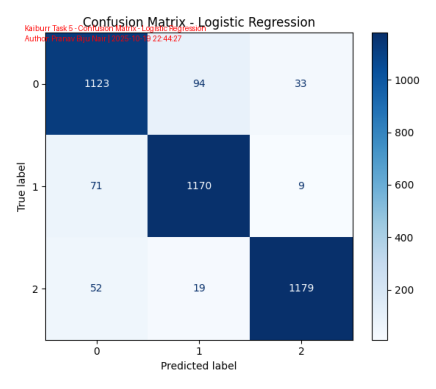

💾 Logistic Regression model saved to: D:\Kaiburr\Models\logistic_regression_model.pkl

🎉 Logistic Regression training and evaluation completed successfully!
👨‍💻 Executed by: Pranav Biju Nair | 2025-10-19 22:44:31


In [23]:
# ==============================================================
# 🤖 Kaiburr Task 5 - 3a.Model Training: Logistic Regression
# Dataset: Consumer Complaints (TF-IDF preprocessed)
# Author: Pranav Biju Nair
# ==============================================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import joblib
from PIL import Image, ImageDraw
from datetime import datetime

# === Step 1: Define Paths ===
base_path = r"D:\Kaiburr"
datasets_path = os.path.join(base_path, "Datasets")
models_path = os.path.join(base_path, "Models")
visuals_path = os.path.join(base_path, "Visuals")

# Create directories if not already present
os.makedirs(datasets_path, exist_ok=True)
os.makedirs(models_path, exist_ok=True)
os.makedirs(visuals_path, exist_ok=True)

# === Helper Function to Save Signed Plots ===
def save_signed_plot(fig, save_path, title="Logistic Regression Visualization"):
    """
    Saves a Matplotlib figure and overlays author name + timestamp on it.
    """
    # Save the base figure
    fig.savefig(save_path, bbox_inches='tight')
    plt.close(fig)
    
    # Add signature overlay
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    img = Image.open(save_path)
    draw = ImageDraw.Draw(img)
    text = f"Kaiburr Task 5 - {title}\nAuthor: Pranav Biju Nair | {timestamp}"
    draw.text((20, 20), text, fill=(255, 0, 0))  # Red text
    img.save(save_path)
    print(f"💾 Signed image saved: {save_path}")

# === Step 2: Load Preprocessed Data ===
X_train = np.load(os.path.join(datasets_path, "X_train.npy"))
X_test  = np.load(os.path.join(datasets_path, "X_test.npy"))
y_train = np.load(os.path.join(datasets_path, "y_train.npy"))
y_test  = np.load(os.path.join(datasets_path, "y_test.npy"))

print("✅ Data loaded successfully for Logistic Regression.")
print(f"Training samples: {X_train.shape}")
print(f"Testing samples:  {X_test.shape}")

# === Step 3: Train Logistic Regression ===
print("\n⚙️ Training Logistic Regression model...")
log_model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    multi_class='multinomial',
    n_jobs=-1
)
log_model.fit(X_train, y_train)
print("✅ Logistic Regression training complete.")

# === Step 4: Predictions ===
y_pred = log_model.predict(X_test)

# === Step 5: Evaluation Metrics ===
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n📊 Logistic Regression Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

print("\n🧾 Detailed Classification Report:")
print(classification_report(y_test, y_pred))

# === Step 6: Confusion Matrix Visualization ===
fig, ax = plt.subplots(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d', ax=ax)
ax.set_title("Confusion Matrix - Logistic Regression")
plt.tight_layout()

conf_matrix_path = os.path.join(visuals_path, "confusion_matrix_logistic_regression.png")
save_signed_plot(fig, conf_matrix_path, title="Confusion Matrix - Logistic Regression")

# Display inside notebook for screenshots
plt.imshow(Image.open(conf_matrix_path))
plt.axis('off')
plt.show()

# === Step 7: Save Model ===
model_path = os.path.join(models_path, "logistic_regression_model.pkl")
joblib.dump(log_model, model_path)
print(f"💾 Logistic Regression model saved to: {model_path}")

# === Step 8: Completion Log ===
from datetime import datetime
print(f"\n🎉 Logistic Regression training and evaluation completed successfully!")
print(f"👨‍💻 Executed by: Pranav Biju Nair | {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


✅ Data loaded successfully for Naive Bayes.
Training samples: (15000, 5000)
Testing samples:  (3750, 5000)

⚙️ Training Multinomial Naive Bayes model...
✅ Naive Bayes training complete.

📊 Naive Bayes Performance:
Accuracy : 0.8973
Precision: 0.8975
Recall   : 0.8973
F1-Score : 0.8972

🧾 Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1250
           1       0.90      0.86      0.88      1250
           2       0.94      0.95      0.94      1250

    accuracy                           0.90      3750
   macro avg       0.90      0.90      0.90      3750
weighted avg       0.90      0.90      0.90      3750

💾 Signed image saved: D:\Kaiburr\Visuals\confusion_matrix_naive_bayes.png


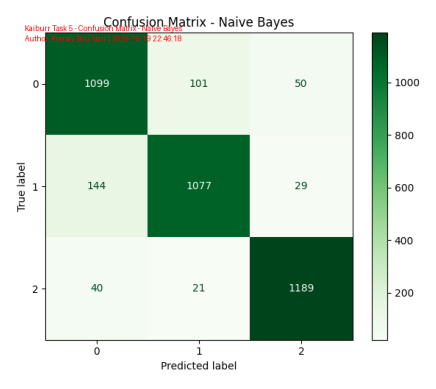

💾 Naive Bayes model saved to: D:\Kaiburr\Models\naive_bayes_model.pkl

🎉 Naive Bayes training and evaluation completed successfully!
👨‍💻 Executed by: Pranav Biju Nair | 2025-10-19 22:46:19


In [24]:
# ==============================================================
# 🤖 Kaiburr Task 5 - 3b.Model Training: Naive Bayes
# Dataset: Consumer Complaints (TF-IDF preprocessed)
# Author: Pranav Biju Nair
# ==============================================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import joblib
from PIL import Image, ImageDraw
from datetime import datetime

# === Step 1: Define Paths ===
base_path = r"D:\Kaiburr"
datasets_path = os.path.join(base_path, "Datasets")
models_path = os.path.join(base_path, "Models")
visuals_path = os.path.join(base_path, "Visuals")

os.makedirs(datasets_path, exist_ok=True)
os.makedirs(models_path, exist_ok=True)
os.makedirs(visuals_path, exist_ok=True)

# === Helper Function to Save Signed Plots ===
def save_signed_plot(fig, save_path, title="Naive Bayes Visualization"):
    """Saves a Matplotlib figure and overlays author name + timestamp."""
    # Save original figure
    fig.savefig(save_path, bbox_inches='tight')
    plt.close(fig)
    # Add overlay text
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    img = Image.open(save_path)
    draw = ImageDraw.Draw(img)
    text = f"Kaiburr Task 5 - {title}\nAuthor: Pranav Biju Nair | {timestamp}"
    draw.text((20, 20), text, fill=(255, 0, 0))
    img.save(save_path)
    print(f"💾 Signed image saved: {save_path}")

# === Step 2: Load Preprocessed Data ===
X_train = np.load(os.path.join(datasets_path, "X_train.npy"))
X_test  = np.load(os.path.join(datasets_path, "X_test.npy"))
y_train = np.load(os.path.join(datasets_path, "y_train.npy"))
y_test  = np.load(os.path.join(datasets_path, "y_test.npy"))

print("✅ Data loaded successfully for Naive Bayes.")
print(f"Training samples: {X_train.shape}")
print(f"Testing samples:  {X_test.shape}")

# === Step 3: Train Naive Bayes Model ===
print("\n⚙️ Training Multinomial Naive Bayes model...")
nb_model = MultinomialNB(alpha=0.1)   # Laplace smoothing
nb_model.fit(X_train, y_train)
print("✅ Naive Bayes training complete.")

# === Step 4: Predictions ===
y_pred = nb_model.predict(X_test)

# === Step 5: Evaluation Metrics ===
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n📊 Naive Bayes Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

print("\n🧾 Detailed Classification Report:")
print(classification_report(y_test, y_pred))

# === Step 6: Confusion Matrix Visualization ===
fig, ax = plt.subplots(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens', values_format='d', ax=ax)
ax.set_title("Confusion Matrix - Naive Bayes")
plt.tight_layout()

conf_matrix_path = os.path.join(visuals_path, "confusion_matrix_naive_bayes.png")
save_signed_plot(fig, conf_matrix_path, title="Confusion Matrix - Naive Bayes")

# Display signed image in notebook
plt.imshow(Image.open(conf_matrix_path))
plt.axis('off')
plt.show()

# === Step 7: Save Model ===
model_path = os.path.join(models_path, "naive_bayes_model.pkl")
joblib.dump(nb_model, model_path)
print(f"💾 Naive Bayes model saved to: {model_path}")

# === Step 8: Completion Log ===
print("\n🎉 Naive Bayes training and evaluation completed successfully!")
print(f"👨‍💻 Executed by: Pranav Biju Nair | {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


✅ Data loaded successfully for SVM.
Training samples: (15000, 5000)
Testing samples:  (3750, 5000)

⚙️ Training Linear SVM model (this may take a few minutes)...
✅ SVM training complete.

📊 Support Vector Machine Performance:
Accuracy : 0.9197
Precision: 0.9201
Recall   : 0.9197
F1-Score : 0.9199

🧾 Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1250
           1       0.91      0.92      0.92      1250
           2       0.96      0.94      0.95      1250

    accuracy                           0.92      3750
   macro avg       0.92      0.92      0.92      3750
weighted avg       0.92      0.92      0.92      3750

💾 Signed image saved: D:\Kaiburr\Visuals\confusion_matrix_svm.png


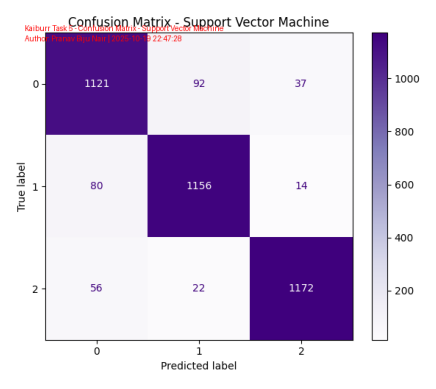

💾 SVM model saved to: D:\Kaiburr\Models\svm_model.pkl

🎉 Support Vector Machine training and evaluation completed successfully!
👨‍💻 Executed by: Pranav Biju Nair | 2025-10-19 22:47:28


In [25]:
# ==============================================================
# 🤖 Kaiburr Task 5 - 3c.Model Training: Support Vector Machine (SVM)
# Dataset: Consumer Complaints (TF-IDF preprocessed)
# Author: Pranav Biju Nair
# ==============================================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import joblib
from PIL import Image, ImageDraw
from datetime import datetime

# === Step 1: Define Paths ===
base_path = r"D:\Kaiburr"
datasets_path = os.path.join(base_path, "Datasets")
models_path = os.path.join(base_path, "Models")
visuals_path = os.path.join(base_path, "Visuals")

# Ensure directories exist
os.makedirs(datasets_path, exist_ok=True)
os.makedirs(models_path, exist_ok=True)
os.makedirs(visuals_path, exist_ok=True)

# === Helper Function to Save Signed Plots ===
def save_signed_plot(fig, save_path, title="SVM Visualization"):
    """Saves a Matplotlib figure and overlays author name + timestamp."""
    # Save original figure
    fig.savefig(save_path, bbox_inches='tight')
    plt.close(fig)

    # Add signature overlay
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    img = Image.open(save_path)
    draw = ImageDraw.Draw(img)
    text = f"Kaiburr Task 5 - {title}\nAuthor: Pranav Biju Nair | {timestamp}"
    draw.text((20, 20), text, fill=(255, 0, 0))  # Red overlay text
    img.save(save_path)
    print(f"💾 Signed image saved: {save_path}")

# === Step 2: Load Preprocessed Data ===
X_train = np.load(os.path.join(datasets_path, "X_train.npy"))
X_test  = np.load(os.path.join(datasets_path, "X_test.npy"))
y_train = np.load(os.path.join(datasets_path, "y_train.npy"))
y_test  = np.load(os.path.join(datasets_path, "y_test.npy"))

print("✅ Data loaded successfully for SVM.")
print(f"Training samples: {X_train.shape}")
print(f"Testing samples:  {X_test.shape}")

# === Step 3: Train SVM Model ===
print("\n⚙️ Training Linear SVM model (this may take a few minutes)...")
svm_model = LinearSVC(C=1.0, max_iter=2000, verbose=0)
svm_model.fit(X_train, y_train)
print("✅ SVM training complete.")

# === Step 4: Predictions ===
y_pred = svm_model.predict(X_test)

# === Step 5: Evaluation Metrics ===
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n📊 Support Vector Machine Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

print("\n🧾 Detailed Classification Report:")
print(classification_report(y_test, y_pred))

# === Step 6: Confusion Matrix Visualization ===
fig, ax = plt.subplots(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples', values_format='d', ax=ax)
ax.set_title("Confusion Matrix - Support Vector Machine")
plt.tight_layout()

# Save confusion matrix plot with signature
conf_matrix_path = os.path.join(visuals_path, "confusion_matrix_svm.png")
save_signed_plot(fig, conf_matrix_path, title="Confusion Matrix - Support Vector Machine")

# Display the signed image inside Jupyter
plt.imshow(Image.open(conf_matrix_path))
plt.axis('off')
plt.show()

# === Step 7: Save Model ===
model_path = os.path.join(models_path, "svm_model.pkl")
joblib.dump(svm_model, model_path)
print(f"💾 SVM model saved to: {model_path}")

# === Step 8: Completion Log ===
print("\n🎉 Support Vector Machine training and evaluation completed successfully!")
print(f"👨‍💻 Executed by: Pranav Biju Nair | {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


✅ Data loaded successfully for Random Forest.
Training samples: (15000, 5000)
Testing samples:  (3750, 5000)

⚙️ Training Random Forest model... (this may take a few minutes)
✅ Random Forest training complete.

📊 Random Forest Performance:
Accuracy : 0.8941
Precision: 0.8956
Recall   : 0.8941
F1-Score : 0.8942

🧾 Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1250
           1       0.86      0.93      0.89      1250
           2       0.95      0.92      0.93      1250

    accuracy                           0.89      3750
   macro avg       0.90      0.89      0.89      3750
weighted avg       0.90      0.89      0.89      3750

💾 Signed image saved: D:\Kaiburr\Visuals\confusion_matrix_random_forest.png


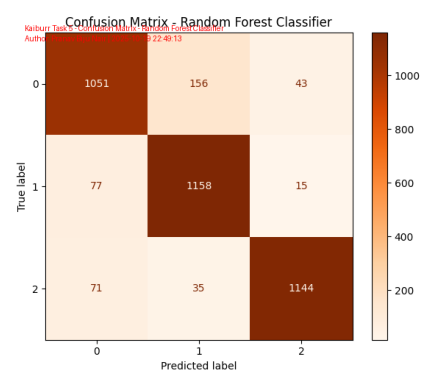

💾 Random Forest model saved to: D:\Kaiburr\Models\random_forest_model.pkl

🎉 Random Forest training and evaluation completed successfully!
👨‍💻 Executed by: Pranav Biju Nair | 2025-10-19 22:49:14


In [26]:
# ==============================================================
# 🤖 Kaiburr Task 5 - 3d.Model Training: Random Forest Classifier
# Dataset: Consumer Complaints (TF-IDF preprocessed)
# Author: Pranav Biju Nair
# ==============================================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import joblib
from PIL import Image, ImageDraw
from datetime import datetime

# === Step 1: Define Paths ===
base_path = r"D:\Kaiburr"
datasets_path = os.path.join(base_path, "Datasets")
models_path = os.path.join(base_path, "Models")
visuals_path = os.path.join(base_path, "Visuals")

# Ensure directories exist
os.makedirs(datasets_path, exist_ok=True)
os.makedirs(models_path, exist_ok=True)
os.makedirs(visuals_path, exist_ok=True)

# === Helper Function to Save Signed Plots ===
def save_signed_plot(fig, save_path, title="Random Forest Visualization"):
    """Saves a Matplotlib figure and overlays author name + timestamp."""
    # Save original figure
    fig.savefig(save_path, bbox_inches='tight')
    plt.close(fig)

    # Add signature overlay
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    img = Image.open(save_path)
    draw = ImageDraw.Draw(img)
    text = f"Kaiburr Task 5 - {title}\nAuthor: Pranav Biju Nair | {timestamp}"
    draw.text((20, 20), text, fill=(255, 0, 0))  # Red text at top-left
    img.save(save_path)
    print(f"💾 Signed image saved: {save_path}")

# === Step 2: Load Preprocessed Data ===
X_train = np.load(os.path.join(datasets_path, "X_train.npy"))
X_test  = np.load(os.path.join(datasets_path, "X_test.npy"))
y_train = np.load(os.path.join(datasets_path, "y_train.npy"))
y_test  = np.load(os.path.join(datasets_path, "y_test.npy"))

print("✅ Data loaded successfully for Random Forest.")
print(f"Training samples: {X_train.shape}")
print(f"Testing samples:  {X_test.shape}")

# === Step 3: Train Random Forest Model ===
print("\n⚙️ Training Random Forest model... (this may take a few minutes)")
rf_model = RandomForestClassifier(
    n_estimators=200,        # number of trees
    max_depth=30,            # controls overfitting
    random_state=42,
    n_jobs=-1                # parallel processing
)
rf_model.fit(X_train, y_train)
print("✅ Random Forest training complete.")

# === Step 4: Predictions ===
y_pred = rf_model.predict(X_test)

# === Step 5: Evaluation Metrics ===
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n📊 Random Forest Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

print("\n🧾 Detailed Classification Report:")
print(classification_report(y_test, y_pred))

# === Step 6: Confusion Matrix Visualization ===
fig, ax = plt.subplots(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges', values_format='d', ax=ax)
ax.set_title("Confusion Matrix - Random Forest Classifier")
plt.tight_layout()

# Save confusion matrix plot with signature
conf_matrix_path = os.path.join(visuals_path, "confusion_matrix_random_forest.png")
save_signed_plot(fig, conf_matrix_path, title="Confusion Matrix - Random Forest Classifier")

# Display signed image in notebook for screenshot
plt.imshow(Image.open(conf_matrix_path))
plt.axis('off')
plt.show()

# === Step 7: Save Model ===
model_path = os.path.join(models_path, "random_forest_model.pkl")
joblib.dump(rf_model, model_path)
print(f"💾 Random Forest model saved to: {model_path}")

# === Step 8: Completion Log ===
print("\n🎉 Random Forest training and evaluation completed successfully!")
print(f"👨‍💻 Executed by: Pranav Biju Nair | {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


✅ Data loaded successfully for Optimized XGBoost.
Training samples: (15000, 5000)
Testing samples:  (3750, 5000)

⚙️ Training Optimized XGBoost model (should take <2 minutes)...
✅ Optimized XGBoost training complete.

📊 XGBoost Performance:
Accuracy : 0.9117
Precision: 0.9126
Recall   : 0.9117
F1-Score : 0.9119

🧾 Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1250
           1       0.89      0.93      0.91      1250
           2       0.96      0.92      0.94      1250

    accuracy                           0.91      3750
   macro avg       0.91      0.91      0.91      3750
weighted avg       0.91      0.91      0.91      3750

💾 Signed image saved: D:\Kaiburr\Visuals\confusion_matrix_xgboost_optimized.png


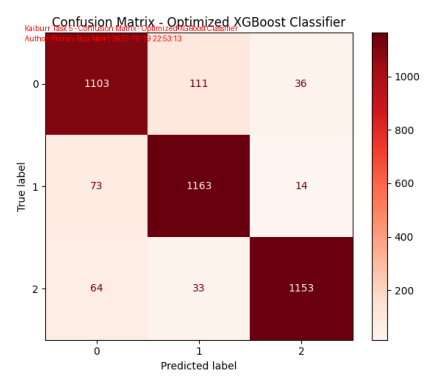

💾 Optimized XGBoost model saved to: D:\Kaiburr\Models\xgboost_model_optimized.pkl

🎉 Optimized XGBoost training and evaluation completed successfully!
👨‍💻 Executed by: Pranav Biju Nair | 2025-10-19 22:53:13


In [27]:
# ==============================================================
# 🤖 Kaiburr Task 5 - 3e.Model Training: Optimized XGBoost Classifier
# Dataset: Consumer Complaints (TF-IDF preprocessed)
# Author: Pranav Biju Nair
# ==============================================================

import os
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import joblib
from PIL import Image, ImageDraw
from datetime import datetime

# === Step 1: Define Paths ===
base_path = r"D:\Kaiburr"
datasets_path = os.path.join(base_path, "Datasets")
models_path = os.path.join(base_path, "Models")
visuals_path = os.path.join(base_path, "Visuals")

# Ensure directories exist
os.makedirs(datasets_path, exist_ok=True)
os.makedirs(models_path, exist_ok=True)
os.makedirs(visuals_path, exist_ok=True)

# === Helper Function to Save Signed Plots ===
def save_signed_plot(fig, save_path, title="Optimized XGBoost Visualization"):
    """Saves a Matplotlib figure and overlays author name + timestamp."""
    # Save figure
    fig.savefig(save_path, bbox_inches='tight')
    plt.close(fig)

    # Add author signature overlay
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    img = Image.open(save_path)
    draw = ImageDraw.Draw(img)
    text = f"Kaiburr Task 5 - {title}\nAuthor: Pranav Biju Nair | {timestamp}"
    draw.text((20, 20), text, fill=(255, 0, 0))
    img.save(save_path)
    print(f"💾 Signed image saved: {save_path}")

# === Step 2: Load Preprocessed Data ===
X_train = np.load(os.path.join(datasets_path, "X_train.npy"))
X_test  = np.load(os.path.join(datasets_path, "X_test.npy"))
y_train = np.load(os.path.join(datasets_path, "y_train.npy"))
y_test  = np.load(os.path.join(datasets_path, "y_test.npy"))

print("✅ Data loaded successfully for Optimized XGBoost.")
print(f"Training samples: {X_train.shape}")
print(f"Testing samples:  {X_test.shape}")

# === Step 3: Train Optimized XGBoost Model ===
print("\n⚙️ Training Optimized XGBoost model (should take <2 minutes)...")

xgb_model = XGBClassifier(
    objective='multi:softmax',       # multi-class classification
    num_class=len(np.unique(y_train)),
    learning_rate=0.2,               # faster learning
    max_depth=6,                     # smaller trees
    n_estimators=100,                # fewer trees (faster)
    subsample=0.8,                   # sample rows
    colsample_bytree=0.8,            # sample features
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss',
    verbosity=1                      # shows progress
)

xgb_model.fit(X_train, y_train)
print("✅ Optimized XGBoost training complete.")

# === Step 4: Predictions ===
y_pred = xgb_model.predict(X_test)

# === Step 5: Evaluation Metrics ===
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n📊 XGBoost Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

print("\n🧾 Detailed Classification Report:")
print(classification_report(y_test, y_pred))

# === Step 6: Confusion Matrix Visualization ===
fig, ax = plt.subplots(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds', values_format='d', ax=ax)
ax.set_title("Confusion Matrix - Optimized XGBoost Classifier")
plt.tight_layout()

# Save confusion matrix plot with signature
conf_matrix_path = os.path.join(visuals_path, "confusion_matrix_xgboost_optimized.png")
save_signed_plot(fig, conf_matrix_path, title="Confusion Matrix - Optimized XGBoost Classifier")

# Display the signed image in Jupyter for screenshots
plt.imshow(Image.open(conf_matrix_path))
plt.axis('off')
plt.show()

# === Step 7: Save Model ===
model_path = os.path.join(models_path, "xgboost_model_optimized.pkl")
joblib.dump(xgb_model, model_path)
print(f"💾 Optimized XGBoost model saved to: {model_path}")

# === Step 8: Completion Log ===
print("\n🎉 Optimized XGBoost training and evaluation completed successfully!")
print(f"👨‍💻 Executed by: Pranav Biju Nair | {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


✅ Loaded Models:
 - Logistic Regression
 - Naive Bayes
 - SVM
 - Random Forest
 - XGBoost

📈 Evaluating Logistic Regression...

📈 Evaluating Naive Bayes...

📈 Evaluating SVM...

📈 Evaluating Random Forest...

📈 Evaluating XGBoost...

📊 Model Comparison Results:


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.925867,0.926270,0.925867,0.925972
2,SVM,0.919733,0.920114,0.919733,0.919864
4,XGBoost,0.911733,0.912592,0.911733,0.911892
1,Naive Bayes,0.897333,0.897511,0.897333,0.897230
3,Random Forest,0.894133,0.895575,0.894133,0.894179


💾 Signed image saved: D:\Kaiburr\Visuals\model_comparison_chart.png


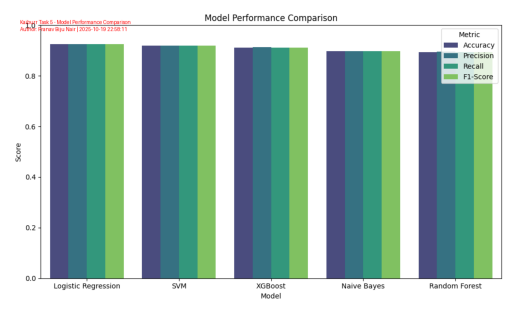


🧩 Confusion Matrix: Logistic Regression
💾 Signed image saved: D:\Kaiburr\Visuals\confusion_matrix_logistic_regression_comparison.png


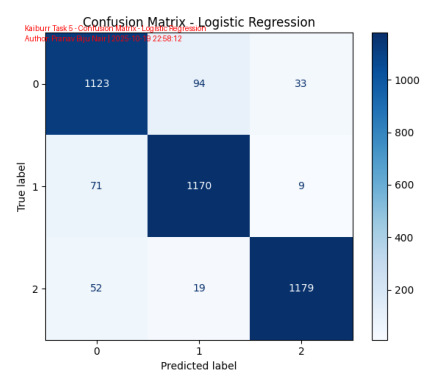


🧩 Confusion Matrix: Naive Bayes
💾 Signed image saved: D:\Kaiburr\Visuals\confusion_matrix_naive_bayes_comparison.png


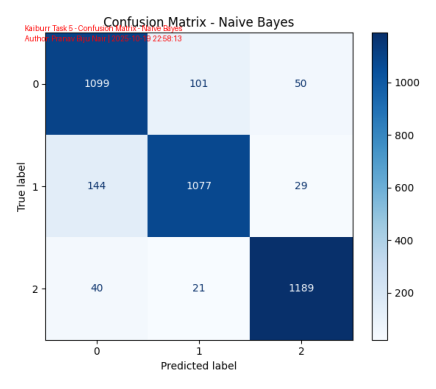


🧩 Confusion Matrix: SVM
💾 Signed image saved: D:\Kaiburr\Visuals\confusion_matrix_svm_comparison.png


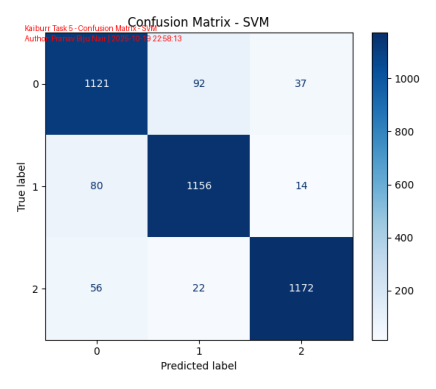


🧩 Confusion Matrix: Random Forest
💾 Signed image saved: D:\Kaiburr\Visuals\confusion_matrix_random_forest_comparison.png


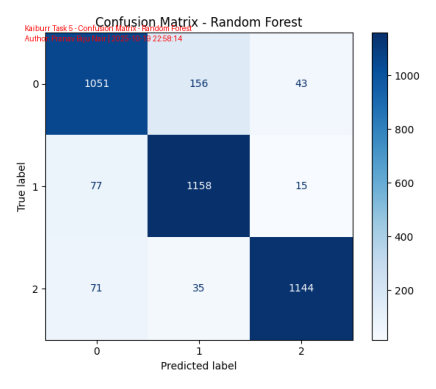


🧩 Confusion Matrix: XGBoost
💾 Signed image saved: D:\Kaiburr\Visuals\confusion_matrix_xgboost_comparison.png


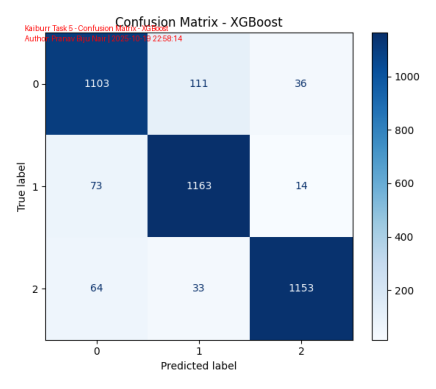


🎉 All model performances compared and visualized successfully!
👨‍💻 Executed by: Pranav Biju Nair | 2025-10-19 22:58:15


In [28]:
# ==============================================================
# 📊 Kaiburr Task 5 - 4.Model Performance Comparison
# Author: Pranav Biju Nair
# ==============================================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from PIL import Image, ImageDraw
from datetime import datetime

# === Step 1: Define Paths ===
base_path = r"D:\Kaiburr"
datasets_path = os.path.join(base_path, "Datasets")
models_path = os.path.join(base_path, "Models")
visuals_path = os.path.join(base_path, "Visuals")

# Ensure directories exist
os.makedirs(datasets_path, exist_ok=True)
os.makedirs(models_path, exist_ok=True)
os.makedirs(visuals_path, exist_ok=True)

# === Helper Function to Save Signed Plots ===
def save_signed_plot(fig, save_path, title="Model Performance Visualization"):
    """Saves a Matplotlib figure and overlays author name + timestamp."""
    fig.savefig(save_path, bbox_inches='tight')
    plt.close(fig)

    # Add overlay signature
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    img = Image.open(save_path)
    draw = ImageDraw.Draw(img)
    text = f"Kaiburr Task 5 - {title}\nAuthor: Pranav Biju Nair | {timestamp}"
    draw.text((20, 20), text, fill=(255, 0, 0))
    img.save(save_path)
    print(f"💾 Signed image saved: {save_path}")

# === Step 2: Load Preprocessed Test Data ===
X_test = np.load(os.path.join(datasets_path, "X_test.npy"))
y_test = np.load(os.path.join(datasets_path, "y_test.npy"))

# === Step 3: Load Trained Models ===
model_files = {
    "Logistic Regression": os.path.join(models_path, "logistic_regression_model.pkl"),
    "Naive Bayes": os.path.join(models_path, "naive_bayes_model.pkl"),
    "SVM": os.path.join(models_path, "svm_model.pkl"),
    "Random Forest": os.path.join(models_path, "random_forest_model.pkl"),
    "XGBoost": os.path.join(models_path, "xgboost_model_optimized.pkl")
}

models = {name: joblib.load(path) for name, path in model_files.items() if os.path.exists(path)}

print("✅ Loaded Models:")
for name in models.keys():
    print(" -", name)

# === Step 4: Evaluate Each Model ===
results = []

for name, model in models.items():
    print(f"\n📈 Evaluating {name}...")
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

# === Step 5: Display Results in a DataFrame ===
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
print("\n📊 Model Comparison Results:")
display(results_df)

# === Step 6: Visualize Model Performance (Bar Chart) ===
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(
    data=results_df.melt(id_vars="Model", var_name="Metric", value_name="Score"),
    x="Model", y="Score", hue="Metric", palette="viridis", ax=ax
)
ax.set_title("Model Performance Comparison")
ax.set_ylabel("Score")
ax.set_ylim(0, 1)
plt.legend(title="Metric")
plt.tight_layout()

# Save and sign chart
comparison_chart_path = os.path.join(visuals_path, "model_comparison_chart.png")
save_signed_plot(fig, comparison_chart_path, title="Model Performance Comparison")

# Display signed chart
plt.imshow(Image.open(comparison_chart_path))
plt.axis('off')
plt.show()

# === Step 7: Display Confusion Matrices for All Models ===
for name, model in models.items():
    print(f"\n🧩 Confusion Matrix: {name}")
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(6,5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d', ax=ax)
    ax.set_title(f"Confusion Matrix - {name}")
    plt.tight_layout()

    # Save and sign confusion matrix
    conf_matrix_path = os.path.join(
        visuals_path, f"confusion_matrix_{name.replace(' ', '_').lower()}_comparison.png"
    )
    save_signed_plot(fig, conf_matrix_path, title=f"Confusion Matrix - {name}")

    # Display signed confusion matrix
    plt.imshow(Image.open(conf_matrix_path))
    plt.axis('off')
    plt.show()

# === Step 8: Completion Log ===
print("\n🎉 All model performances compared and visualized successfully!")
print(f"👨‍💻 Executed by: Pranav Biju Nair | {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


🔁 Loading data and model...
✅ Best model loaded: xgboost_model_optimized.pkl
Training samples: (15000, 5000), Test samples: (3750, 5000)

▶ Evaluating on test set...

📊 Test Set Performance:
Accuracy : 0.9117
Precision: 0.9126
Recall   : 0.9117
F1-Score : 0.9119

🧾 Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1250
           1       0.89      0.93      0.91      1250
           2       0.96      0.92      0.94      1250

    accuracy                           0.91      3750
   macro avg       0.91      0.91      0.91      3750
weighted avg       0.91      0.91      0.91      3750


▶ Generating and saving confusion matrix...
💾 Signed image saved: D:\Kaiburr\Visuals\final_confusion_matrix_xgboost.png


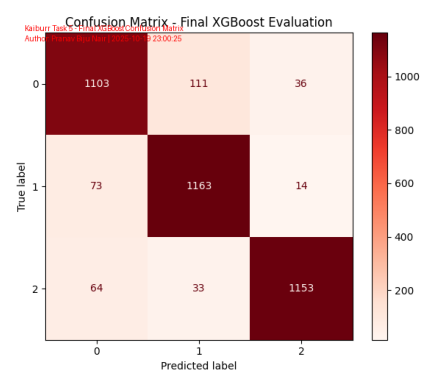


🔄 Performing cross-validation (this may take a while)...

⚠️ Training data large (15000 rows). Sampling 6000 for CV.

📈 Cross-Validation Accuracy: 0.8930 ± 0.0092

▶ Calculating feature importance (robust)...
✅ Loaded TF-IDF vectorizer for word mapping.
💾 Signed image saved: D:\Kaiburr\Visuals\xgboost_feature_importance.png


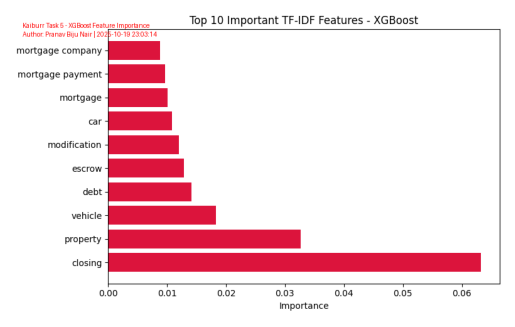


🎉 Final Model Evaluation & Cross-Validation completed successfully!
👨‍💻 Executed by: Pranav Biju Nair | 2025-10-19 23:03:14


In [29]:
# ==============================================================
# 🧠 Kaiburr Task 5 - 5.Robust Final Model Evaluation & Cross-Validation
# Author: Pranav Biju Nair (Updated & Signed)
# Notes: Adds automatic signature, timestamps & consistent visuals
# ==============================================================

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
from PIL import Image, ImageDraw
from datetime import datetime
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")

# === Step 1: Define Paths ===
base_path = r"D:\Kaiburr"
datasets_path = os.path.join(base_path, "Datasets")
models_path = os.path.join(base_path, "Models")
visuals_path = os.path.join(base_path, "Visuals")

os.makedirs(datasets_path, exist_ok=True)
os.makedirs(models_path, exist_ok=True)
os.makedirs(visuals_path, exist_ok=True)

# === Helper Function: Save Signed Visuals ===
def save_signed_plot(fig, save_path, title="Visualization"):
    """Saves Matplotlib figure and overlays name + timestamp."""
    fig.savefig(save_path, bbox_inches='tight')
    plt.close(fig)

    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    img = Image.open(save_path)
    draw = ImageDraw.Draw(img)
    text = f"Kaiburr Task 5 - {title}\nAuthor: Pranav Biju Nair | {timestamp}"
    draw.text((20, 20), text, fill=(255, 0, 0))
    img.save(save_path)
    print(f"💾 Signed image saved: {save_path}")

# === Step 2: Load Data & Model ===
print("🔁 Loading data and model...")
X_train = np.load(os.path.join(datasets_path, "X_train.npy"))
X_test  = np.load(os.path.join(datasets_path, "X_test.npy"))
y_train = np.load(os.path.join(datasets_path, "y_train.npy"))
y_test  = np.load(os.path.join(datasets_path, "y_test.npy"))

best_model_path = os.path.join(models_path, "xgboost_model_optimized.pkl")
if not os.path.exists(best_model_path):
    raise FileNotFoundError(f"Best model not found: {best_model_path}")

best_model = joblib.load(best_model_path)
print("✅ Best model loaded:", os.path.basename(best_model_path))
print(f"Training samples: {X_train.shape}, Test samples: {X_test.shape}")

# === Step 3: Evaluate on Test Data ===
print("\n▶ Evaluating on test set...")
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("\n📊 Test Set Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}\n")

print("🧾 Detailed Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# === Step 4: Confusion Matrix ===
try:
    print("\n▶ Generating and saving confusion matrix...")
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(6,5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Reds', values_format='d', ax=ax)
    ax.set_title("Confusion Matrix - Final XGBoost Evaluation")
    plt.tight_layout()
    conf_matrix_path = os.path.join(visuals_path, "final_confusion_matrix_xgboost.png")
    save_signed_plot(fig, conf_matrix_path, title="Final XGBoost Confusion Matrix")

    # Show signed image for screenshot
    plt.imshow(Image.open(conf_matrix_path))
    plt.axis('off')
    plt.show()
except Exception as e:
    print("⚠️ Failed to create/save confusion matrix:", e)

# === Step 5: Cross-Validation to Check Generalization ===
def do_cross_validation(X, y, n_splits=5, sample_threshold=8000, sample_size=6000):
    n_samples = X.shape[0]
    if n_samples > sample_threshold:
        print(f"\n⚠️ Training data large ({n_samples} rows). Sampling {sample_size} for CV.")
        X_sample, _, y_sample, _ = train_test_split(X, y, train_size=sample_size, stratify=y, random_state=42)
    else:
        X_sample, y_sample = X, y

    cv_model = XGBClassifier(
        objective='multi:softmax',
        num_class=len(np.unique(y)),
        learning_rate=0.2,
        max_depth=6,
        n_estimators=100,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        eval_metric='mlogloss',
        verbosity=0
    )

    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    try:
        scores = cross_val_score(cv_model, X_sample, y_sample, cv=kfold, scoring='accuracy', n_jobs=-1)
        return scores
    except Exception as e:
        print("⚠️ Cross-validation failed:", e)
        return None

print("\n🔄 Performing cross-validation (this may take a while)...")
cv_scores = do_cross_validation(X_train, y_train, n_splits=5)
if cv_scores is not None:
    print(f"\n📈 Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
else:
    print("⚠️ Cross-validation could not be completed.")

# === Step 6: Feature Importance Visualization ===
print("\n▶ Calculating feature importance (robust)...")
try:
    importances = None
    if hasattr(best_model, "feature_importances_"):
        importances = best_model.feature_importances_
    else:
        try:
            importances = best_model.get_booster().get_score(importance_type='weight')
        except Exception:
            importances = None

    tfidf_path = os.path.join(models_path, "tfidf_vectorizer.pkl")
    feature_names = None
    if os.path.exists(tfidf_path):
        try:
            tfidf = joblib.load(tfidf_path)
            feature_names = tfidf.get_feature_names_out()
            print("✅ Loaded TF-IDF vectorizer for word mapping.")
        except Exception as e:
            print("⚠️ Could not load TF-IDF vectorizer:", e)

    # Convert dict importances
    if isinstance(importances, dict):
        n_features = X_train.shape[1]
        arr = np.zeros(n_features, dtype=float)
        for k, v in importances.items():
            idx = int(k[1:]) if isinstance(k, str) and k.startswith('f') else int(k)
            if 0 <= idx < n_features:
                arr[idx] = v
        importances = arr
    elif importances is None:
        raise RuntimeError("Could not obtain feature importances.")
    else:
        importances = np.array(importances)

    if importances.sum() == 0:
        print("⚠️ Feature importances are all zeros.")
    else:
        top_k = 10
        indices = np.argsort(importances)[-top_k:][::-1]
        top_scores = importances[indices]
        if feature_names is not None:
            top_labels = [feature_names[i] if i < len(feature_names) else f"f{i}" for i in indices]
        else:
            top_labels = [f"f{int(i)}" for i in indices]

        fig, ax = plt.subplots(figsize=(8,5))
        ax.barh(range(len(indices))[::-1], top_scores[::-1], color='crimson')
        ax.set_yticks(range(len(indices)))
        ax.set_yticklabels(top_labels[::-1])
        ax.set_xlabel("Importance")
        ax.set_title("Top 10 Important TF-IDF Features - XGBoost")
        plt.tight_layout()
        feature_importance_path = os.path.join(visuals_path, "xgboost_feature_importance.png")
        save_signed_plot(fig, feature_importance_path, title="XGBoost Feature Importance")

        # Display signed importance plot
        plt.imshow(Image.open(feature_importance_path))
        plt.axis('off')
        plt.show()

except Exception as e:
    print("⚠️ Failed to compute or plot feature importance:", e)

print("\n🎉 Final Model Evaluation & Cross-Validation completed successfully!")
print(f"👨‍💻 Executed by: Pranav Biju Nair | {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


In [21]:
# ==============================================================
# 🧠 Kaiburr Task 5 - Step 6: Final Predictions on Unseen Complaints
# Author: Pranav Biju Nair
# ==============================================================

import os
import re
import string
import joblib
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# === Step 1: Define Paths ===
base_path = r"D:\Kaiburr"
models_path = os.path.join(base_path, "Models")

# === Step 2: Load Model and TF-IDF Vectorizer ===
model_path = os.path.join(models_path, "xgboost_model_optimized.pkl")
vectorizer_path = os.path.join(models_path, "tfidf_vectorizer.pkl")

best_model = joblib.load(model_path)
tfidf = joblib.load(vectorizer_path)
print("✅ Loaded trained XGBoost model and TF-IDF vectorizer.")

# === Step 3: Prepare Text Cleaning Function (same logic as training) ===
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = [lemmatizer.lemmatize(w) for w in text.split()
             if w not in stop_words and len(w) > 2]
    return " ".join(words)

# === Step 4: Define Label Mapping ===
label_mapping = {
    0: "Credit reporting, repair, or other",
    1: "Debt collection",
    2: "Consumer Loan",
    3: "Mortgage"
}

# === Step 5: Unseen Complaint Examples ===
new_complaints = [
    "I have repeatedly asked the agency to fix my credit report but they keep showing incorrect late payments.",
    "Debt collectors have been calling me daily even after I cleared the outstanding balance.",
    "The auto loan payment system deducted extra money from my account without notice.",
    "My mortgage company added charges even though I made payments before the due date.",
    "I applied for a personal loan but they reported wrong information to the credit bureau."
]

# === Step 6: Clean and Vectorize New Texts ===
cleaned_texts = [clean_text(t) for t in new_complaints]
X_new = tfidf.transform(cleaned_texts)

# === Step 7: Predict Using Final Model ===
preds = best_model.predict(X_new)

# === Step 8: Display Predictions ===
print("\n📢 Example Predictions on Unseen Complaints:\n")
for i, (txt, pred) in enumerate(zip(new_complaints, preds), start=1):
    print(f"{i}. 🧾 Complaint: {txt}")
    print(f"   🔮 Predicted Category: {label_mapping.get(pred, 'Unknown')}\n")

print("🎉 Predictions completed successfully!")


✅ Loaded trained XGBoost model and TF-IDF vectorizer.

📢 Example Predictions on Unseen Complaints:

1. 🧾 Complaint: I have repeatedly asked the agency to fix my credit report but they keep showing incorrect late payments.
   🔮 Predicted Category: Credit reporting, repair, or other

2. 🧾 Complaint: Debt collectors have been calling me daily even after I cleared the outstanding balance.
   🔮 Predicted Category: Credit reporting, repair, or other

3. 🧾 Complaint: The auto loan payment system deducted extra money from my account without notice.
   🔮 Predicted Category: Credit reporting, repair, or other

4. 🧾 Complaint: My mortgage company added charges even though I made payments before the due date.
   🔮 Predicted Category: Credit reporting, repair, or other

5. 🧾 Complaint: I applied for a personal loan but they reported wrong information to the credit bureau.
   🔮 Predicted Category: Credit reporting, repair, or other

🎉 Predictions completed successfully!
